#Problem 01

(-0.5, 719.5, 809.5, -0.5)

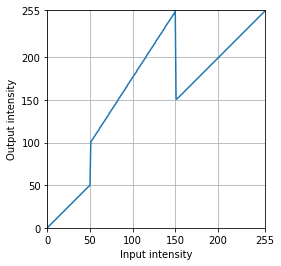

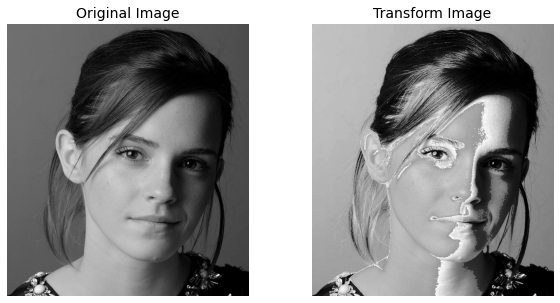

In [3]:
%matplotlib inline
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

#making numpy array to store the critical points
c = np.array([(50,100),(150,254)])

#5 lines
t1=np.linspace(0,c[0,0],c[0,0]+1-0).astype("uint8")
t2=np.linspace(c[0,0],c[0,1],0).astype("uint8")
t3=np.linspace(c[0,1]+1,c[1,1],c[1,0]-c[0,0]).astype("uint8")
t4=np.linspace(c[1,1]-1,c[1,0],0).astype("uint8")
t5=np.linspace(c[1,0]+1,c[1,1],c[1,1]-c[1,0]+1).astype("uint8")


#combining them into one graph
transform = np.concatenate((t1,t2),axis=0).astype("uint8")
transform =np.concatenate((transform,t3),axis=0).astype("uint8")
transform =np.concatenate((transform,t4),axis=0).astype("uint8")
transform =np.concatenate((transform,t5),axis=0).astype("uint8")

#plotting the graph
fig,ax  = plt.subplots()
ax.plot(transform)
ax.set_xlabel(r'Input intensity')
ax.set_ylabel('Output intensity')
ax.set_xlim(0,255)
ax.set_ylim(0,255)
label = [0, 50, 100,150, 200,255]
ax.grid("on")
plt.xticks(label)
plt.yticks(label)

ax.set_aspect("equal") # To ensure the aspect ratio of x and y axis are equal

#output the original Image
original_image = cv.imread("emma.jpg",cv.IMREAD_GRAYSCALE)
cv.imshow("Image",original_image)
cv.waitKey(0)
cv.destroyAllWindows()

#output the intensity added Image
image_t = cv.LUT(original_image,transform)
cv.imshow("Image",image_t)
cv.waitKey(0)
cv.destroyAllWindows()


fig,ax = plt.subplots(1,2,figsize = (10,5))

ax[0].imshow(cv.cvtColor(original_image,cv.COLOR_BGR2RGB))
ax[0].set_title('Original Image', fontsize = 14)
ax[0].axis('off')

ax[1].imshow(cv.cvtColor(image_t,cv.COLOR_BGR2RGB))
ax[1].set_title('Transform Image', fontsize = 14)
ax[1].axis('off')

#Problem 2

(-0.5, 180.5, 216.5, -0.5)

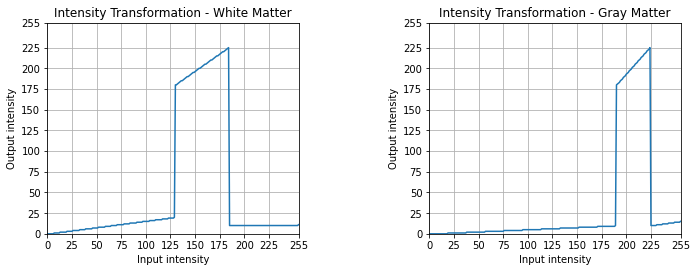

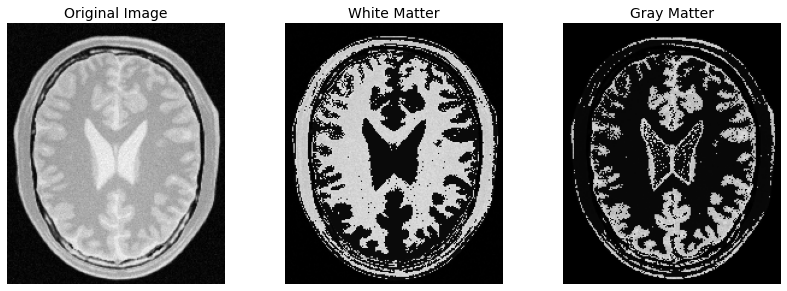

In [17]:
%matplotlib inline
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt


#For white matter
white1 = np.linspace(0, 20, 130).astype("uint8")
white2 = np.linspace(180, 225, 55).astype("uint8")
white3 = np.linspace(10, 11, 71).astype("uint8")

#For gray matter
gray1 = np.linspace(0, 10, 190).astype("uint8")
gray2 = np.linspace(180, 225, 35).astype("uint8")
gray3 = np.linspace(10, 15, 31).astype("uint8")

#concatenating the intensity graphs
white = np.concatenate((white1,white2,white3),axis=0).astype(np.uint8)
gray = np.concatenate((gray1,gray2,gray3),axis=0).astype(np.uint8)

assert len(white) == 256
assert len(gray) == 256

#plotting the graphs
fig, ax = plt.subplots(1,2,figsize = (12,6))
fig.tight_layout(pad =10.0)

label = [0, 25, 50, 75, 100, 125, 150, 175, 200, 225,255]

#white matter
ax[0].plot(white)
ax[0].set_title('Intensity Transformation - White Matter')
ax[0].grid("on")
ax[0].set_xlim([0, 255])
ax[0].set_ylim([0, 255])
ax[0].set_xticks(label)
ax[0].set_yticks(label)
ax[0].set_xlabel('Input intensity')
ax[0].set_ylabel('Output intensity')

#gray matter
ax[1].plot(gray)
ax[1].set_title("Intensity Transformation - Gray Matter")
ax[1].grid("on")
ax[1].set_xlim([0,255])
ax[1].set_ylim([0,255])
ax[1].set_xticks(label)
ax[1].set_yticks(label)
ax[1].set_xlabel('Input intensity')
ax[1].set_ylabel('Output intensity')

#taking the Image
im = cv.imread("BrainProtonDensitySlice9.png",cv.IMREAD_GRAYSCALE)

#convert the image to correct look up table
white_transform = cv.LUT(im,white)
gray_transform = cv.LUT(im,gray)

fig, ax = plt.subplots(1,3,figsize = (12,12))
fig.tight_layout(pad =4.0)

ax[0].imshow(cv.cvtColor(im,cv.COLOR_BGR2RGB))
ax[0].set_title('Original Image', fontsize = 14)
ax[0].axis('off')

ax[1].imshow(cv.cvtColor(white_transform,cv.COLOR_BGR2RGB))
ax[1].set_title('White Matter', fontsize = 14)
ax[1].axis('off')

ax[2].imshow(cv.cvtColor(gray_transform,cv.COLOR_BGR2RGB))
ax[2].set_title('Gray Matter', fontsize = 14)
ax[2].axis('off')

#Problem 3

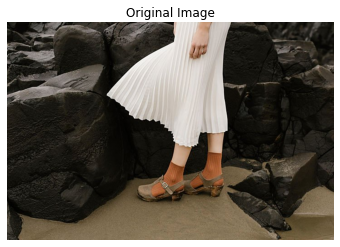

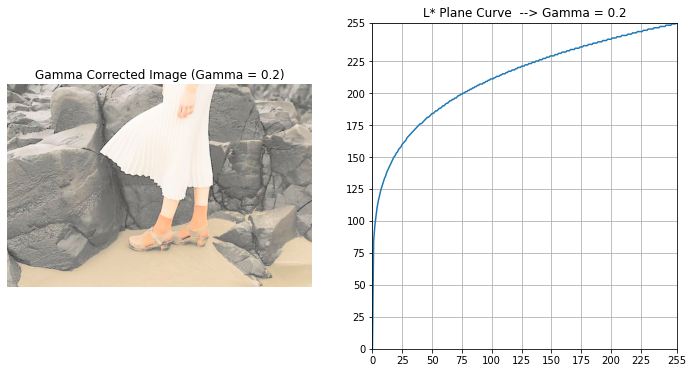

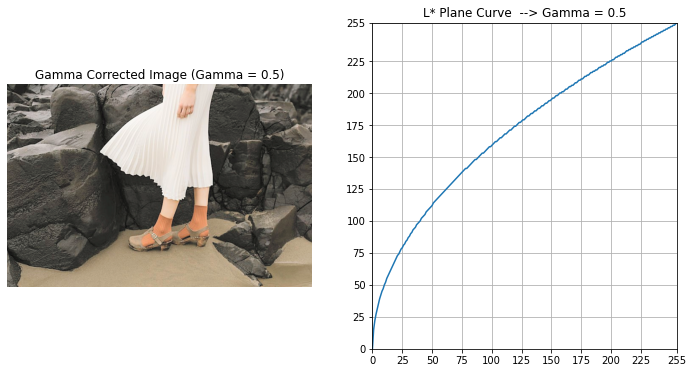

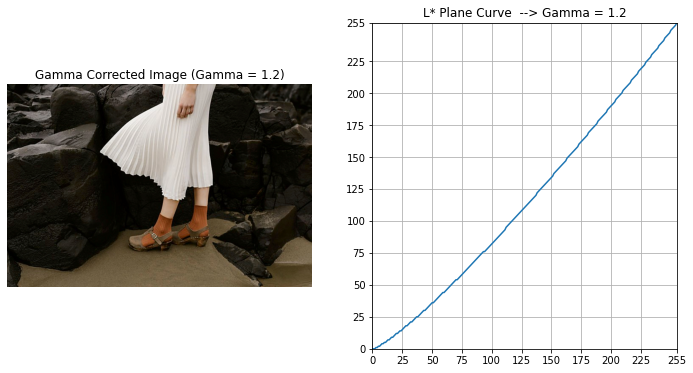

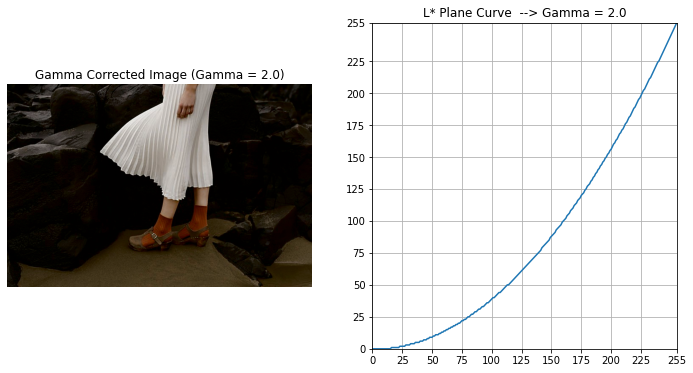

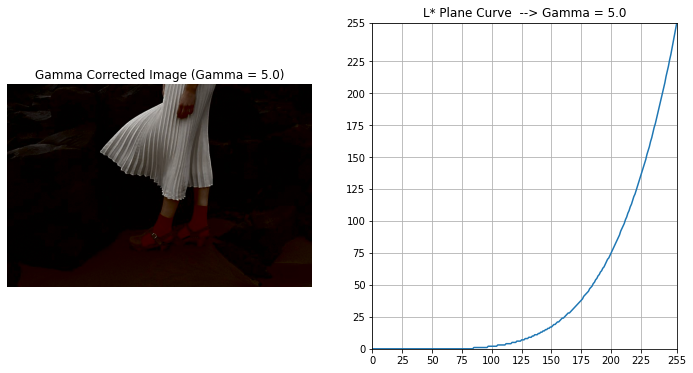

In [12]:
im = cv.imread("highlights_and_shadows.jpg",cv.IMREAD_COLOR)

#convert the image color to L*a*b color space
lab = cv.cvtColor(im, cv.COLOR_BGR2LAB) 

#ploting the original Image
fig, ax = plt.subplots()
ax.imshow(cv.cvtColor(im ,cv.COLOR_BGR2RGB))
ax.set_title("Original Image")
ax.axis('off')

L, a, b = cv.split(lab) #split the L,a,b values

gamma = [0.2, 0.5, 1.2, 2.0, 5.0]


for g in gamma:
    #making the look up tables for gamma values
    lookUpTable = np.array([(p/255)**(g)*255 for p in range(0, 256)]).astype(np.uint8)

    Lgamma = cv.LUT(L, lookUpTable)

    lab_gamma = cv.merge([Lgamma, a, b])

    img = cv.cvtColor(lab_gamma, cv.COLOR_LAB2BGR)
            
    label = [0, 25, 50, 75, 100, 125, 150, 175, 200, 225, 255]

    fig, ax = plt.subplots(1, 2, figsize = (12, 6))
    ax[0].imshow(cv.cvtColor(img ,cv.COLOR_BGR2RGB))
    ax[0].axis('off')
    ax[0].set_title("Gamma Corrected Image (Gamma = " + str(g)+")")


    ax[1].plot(lookUpTable)
    ax[1].set_title("L* Plane Curve  --> Gamma = " + str(g))
    ax[1].grid("on")
    ax[1].set_xlim([0, 255])
    ax[1].set_ylim([0, 255])
    ax[1].set_xticks(label)
    ax[1].set_yticks(label)
    plt.show()